In [19]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

In [ ]:
# Load Data

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicates that the expected vote share in each district is:
<ul>
<ol> Purple: 55%. Yellow: 45%
<ol> Purple: 55%. Yellow: 45%
<ol> Purple: 55%. Yellow: 45%
<ol> Purple: 55%. Yellow: 45%
<ol> Purple: 55%. Yellow: 45%
<ol> Purple: 55%. Yellow: 45%
<ol> Purple: 55%. Yellow: 45%
</ul>

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [9]:
# Please don't edit this part. 
# Setup vote data. 
voter_turnout_history = [53, 57, 48, 55, 54, 56, 49, 57, 56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [1.2, 4.3, -1.7, 3.1, 3.0, 3.4, -.3, 4.2, 3.9]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table.head()

,voter_turn_percentage,Yellow_improvement,year
0,53,1.2,2013
1,57,4.3,2014
2,48,-1.7,2015
3,55,3.1,2016
4,54,3.0,2017


<AxesSubplot:xlabel='voter_turn_percentage', ylabel='Yellow_improvement'>

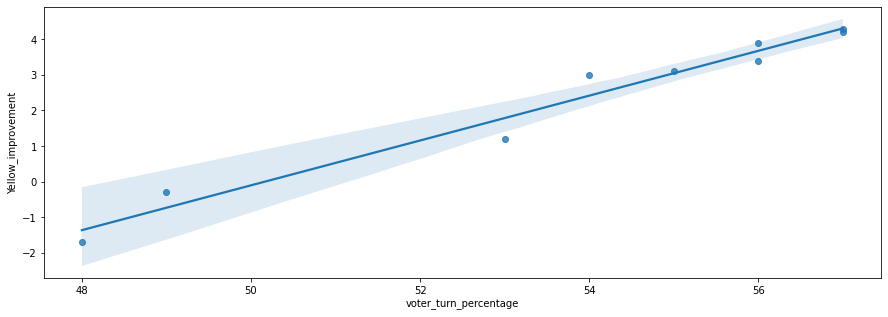

In [11]:
sns.regplot(data=past_vote_table, x="voter_turn_percentage", y="Yellow_improvement", ci=0)

##### Step 1 - Turnout Adjustment

In [12]:
inter, slope = thinkstats2.LeastSquares(past_vote_table["voter_turn_percentage"], past_vote_table["Yellow_improvement"])
print("Y intercept:", inter)
print("Slope:", slope)

def voteAdjustr(turnout, sl=.6305, inte=-31.6342):
    adj_vote = sl*turnout + inte
    return adj_vote

Y intercept: -31.632499999999997
Slope: 0.6305


##### Step 2 - Simulate

### Part 2 - Regression

Use the data provided to try to predict the wage. 

The data is from the FIFA video game rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. 

In [13]:
df = pd.read_csv("players_20.csv")
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,86,75,68,94,48,94,75,96,33,26
1,405000,84,94,89,83,87,89,81,76,77,...,95,85,78,93,63,82,85,95,28,24
2,290000,87,87,62,87,87,96,88,87,81,...,80,81,49,84,51,90,90,94,27,29
3,125000,13,11,15,43,13,12,13,14,40,...,59,41,78,12,34,65,11,68,27,18
4,470000,81,84,61,89,83,95,83,79,83,...,82,84,63,80,54,89,88,91,34,22


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   wage_eur                    18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_reactions          18278 non-null  int64
 14  moveme

In [17]:
df.isnull().sum().sort_values(ascending=False)

wage_eur                      0
movement_reactions            0
defending_marking             0
mentality_composure           0
mentality_penalties           0
mentality_vision              0
mentality_aggression          0
power_long_shots              0
power_strength                0
power_stamina                 0
power_shot_power              0
movement_balance              0
movement_sprint_speed         0
attacking_crossing            0
movement_acceleration         0
skill_ball_control            0
skill_long_passing            0
skill_fk_accuracy             0
skill_curve                   0
skill_dribbling               0
attacking_volleys             0
attacking_short_passing       0
attacking_heading_accuracy    0
attacking_finishing           0
defending_sliding_tackle      0
dtype: int64

In [15]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_shot_power,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,58.181694,62.889485,65.234763,46.812945,55.742149,53.609749,48.383357,58.528778,46.848889,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,13.326083,16.017954,12.534811,19.322343,17.318157,13.955626,15.708099,11.880840,20.091287,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,14.000000,12.000000,20.000000,4.000000,9.000000,9.000000,7.000000,12.000000,1.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,48.000000,56.000000,58.000000,32.000000,44.000000,44.000000,39.000000,51.000000,29.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,59.000000,66.000000,66.000000,51.000000,58.000000,55.000000,49.000000,60.000000,52.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,68.000000,74.000000,74.000000,62.000000,69.000000,64.000000,60.000000,67.000000,64.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,95.000000,97.000000,97.000000,94.000000,95.000000,94.000000,92.000000,96.000000,94.000000,90.000000


In [ ]:
sns.pairplot(df)

##### Do Regression

In [18]:
y = np.array(df["wage_eur"]).reshape(-1,1)
x = np.array(df.drop(columns={"wage_eur"}))
x.shape, y.shape

((18278, 24), (18278, 1))

In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y)

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)
r2 = model.score(xTest, yTest)
rmse = mean_squared_error(yTest, preds)
print("RMSE:", rmse, "\nR2:", r2)

RMSE: 303612387.6494351 
R2: 0.2993627005419609


#### Examine Colinerarity